In [2]:
import os
import sys

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

repo_root = os.path.abspath(os.path.join(os.getcwd(), '..',))
sys.path.append(repo_root)

from src.utils.file_handlers import group_dataset_files, read_dataset_files
from src.models.BradleyTerry import compute_predicted_ratings_HO_BT
from src.models.zermello import compute_predicted_ratings_plackett_luce
from src.utils.convergence_test_helpers import test_convergence
from src.utils.metrics import measure_likelihood, measure_leadership_likelihood, measure_tau
from src.utils.operation_helpers import run_models_synthetic, run_models, split_games
from sklearn.model_selection import train_test_split
from src.utils.c_operation_helpers import run_simulation_synthetic, run_simulation, run_simulation_convergence

## Synthetic 

In [ ]:
data_dir = os.path.join(repo_root, 'datasets', 'Synthetic_Data')
grouped = group_dataset_files(data_dir)

for dataset in grouped:
    print(dataset)
    data, pi_values = read_dataset_files(grouped[dataset], data_dir, is_synthetic=True)
 
    # train, test = train_test_split(data, train_size=.8)
    train, test = split_games(data, .8)
    predicted, iter = compute_predicted_ratings_HO_BT(train, pi_values, verbose=True)
    print(f"Iterations: {len(iter)}")
    print(f"HO Likelihood: {measure_likelihood(predicted, test)}")

    print(run_models_synthetic(train, test, pi_values))

    break

N-1000_M-1000_K-5_L-0
Iterations: 15
HO Likelihood: -3.7904066740549327
    model  log-likelihood  leadership-log-likelihood       rms       rho  \
0     BIN       -3.860027                  -1.150858  0.977596  0.869107   
1    BINL       -4.289491                  -1.299505  1.355972  0.675185   
2   HO_BT       -3.790407                  -1.159113  0.999555  0.873271   
3  HOL_BT       -4.177812                  -1.305161  1.390491  0.682058   

        tau  iteration  
0  0.690127         12  
1  0.487293         10  
2  0.694604         14  
3  0.492518         12  


In [19]:
data_dir = os.path.join(repo_root, 'datasets', 'Synthetic_Data')
grouped = group_dataset_files(data_dir)
for dataset in grouped:
    print(dataset)
    edge_file = grouped[dataset]['edges']
    node_file = grouped[dataset]['nodes']

    edge_path = os.path.join(data_dir, edge_file)
    node_path = os.path.join(data_dir, node_file)

    results = run_simulation_synthetic(node_path, edge_path, .8)
    print(results)

N-1000_M-1000_K-5_L-0
  model  av_error  spearman   kendall     prior   HO_Like  HOL_Like iterations
0    HO  0.147444  0.860814  0.676052  -1.75452  -9.96438   -1.0784         15
1   HOL  0.211547  0.656403  0.473626  -1.57363  -11.0837    -1.224         14
2   BIN  0.153258    0.8533  0.667327  -1.85942  -10.1232  -1.07636         13
3  BINL  0.216784  0.649555  0.468609  -1.68726  -11.2193  -1.20933         11


In [4]:
data_dir = os.path.join(repo_root, 'datasets', 'Synthetic_Data')
grouped = group_dataset_files(data_dir)

for dataset in grouped:
    print(dataset)
    data, pi_values = read_dataset_files(grouped[dataset], data_dir, is_synthetic=True)
 
    train, test = train_test_split(data, train_size=.8)

    ho, pl = test_convergence(train, pi_values)

    break

N-1000_M-1000_K-5_L-0


In [5]:
def stop_array_sequentially(array, threshold=1e-6):
    for i, value in enumerate(array):
        if value < threshold:
            print(i)
            return array[:i]
    return array


16
63


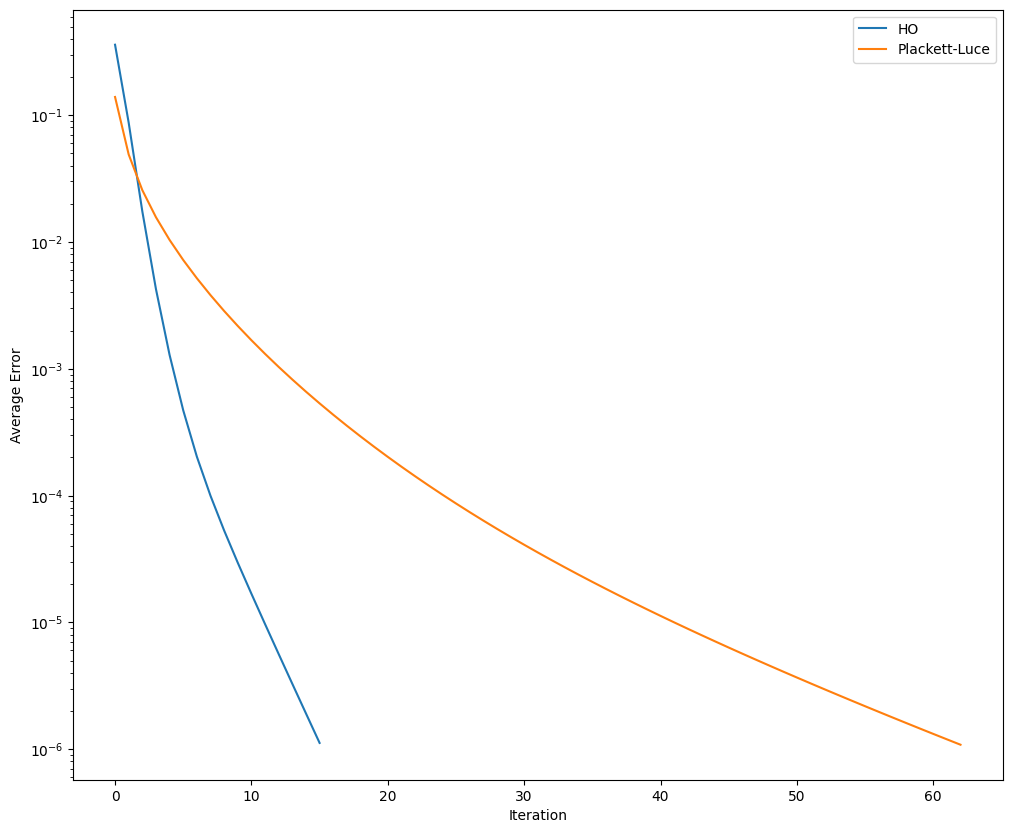

In [6]:
above_thresh_ho = stop_array_sequentially(ho[1:])
above_thresh_PL = stop_array_sequentially(pl[1:])

plt.figure(figsize=(12, 10))
plt.yscale('log')
plt.plot(above_thresh_ho, label='HO')
plt.plot(above_thresh_PL, label='Plackett-Luce')
plt.xlabel('Iteration')
plt.ylabel('Average Error')
plt.legend()

plt.savefig('Convergence')
plt.show()

## Real

In [7]:
data_dir = os.path.join(repo_root, 'datasets', 'Real_Data')
grouped = group_dataset_files(data_dir)

data, pi_values = read_dataset_files(grouped['00103'], data_dir, is_synthetic=False)

# train, test = train_test_split(data, train_size=.8)
train, test = split_games(data, .8)

_, info = compute_predicted_ratings_HO_BT(train, pi_values, verbose=True)        
print(len(info))
_, info = compute_predicted_ratings_plackett_luce(train, pi_values, verbose=True)        
print(len(info))

df = run_models(train, test, pi_values)
print(df)


9
33
         model  log-likelihoods  leadership-log-likelihood
0          BIN        -1.114443                  -0.797533
1         BINL        -1.157655                  -0.848127
2        HO_BT        -1.125242                  -0.796789
3       HOL_BT        -1.165890                  -0.844432
4  Spring_Rank        -1.106598                  -0.808997
5    Page_Rank        -1.320841                  -0.897634
6   Point_Wise        -1.385558                  -1.065916


In [8]:
data_dir = os.path.join(repo_root, 'datasets', 'Real_Data')
grouped = group_dataset_files(data_dir)

edge_file = grouped['00103']['edges']
node_file = grouped['00103']['nodes']

edge_path = os.path.join(data_dir, edge_file)
node_path = os.path.join(data_dir, node_file)

results = run_simulation(node_path, edge_path, .8)
print(results)

  model  av_error    spearman      kendall     prior   HO_Like   HOL_Like  \
0    HO  0.348286  0.00776195  -0.00617103   -1.5472  -2.74475  -0.832101   
1   HOL  0.337642  -0.0605962   -0.0443726  -1.48279   -2.7423  -0.823259   
2   BIN  0.354589   0.0313075    0.0114605  -1.58531  -2.79209  -0.843856   
3  BINL  0.352315  -0.0129362   -0.0185131  -1.54139  -2.78931  -0.837696   

  iterations  
0         10  
1         10  
2         10  
3         10  


In [9]:
data_dir = os.path.join(repo_root, 'datasets', 'Real_Data')
grouped = group_dataset_files(data_dir)

edge_file = grouped['00106']['edges']
node_file = grouped['00106']['nodes']

edge_path = os.path.join(data_dir, edge_file)
node_path = os.path.join(data_dir, node_file)

results = run_simulation_convergence(node_path, edge_path, 1, .8)
print(len(results['HO']['rms_convergence_criteria']))
print(len(results['Z']['rms_convergence_criteria']))

14
24
